In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [6]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
# generate points
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# concatenate all points to create a dataset
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3
# assign label to points
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

print(len(X1))

500


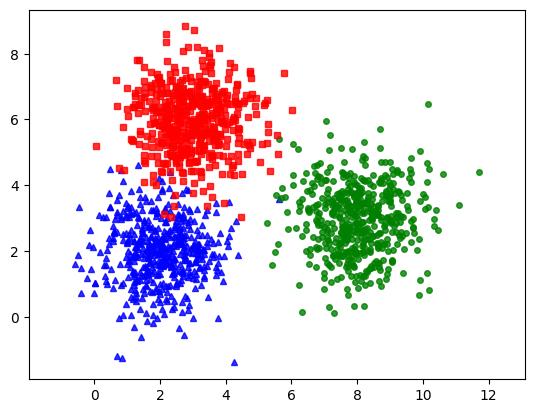

In [22]:
def kmeans_display(X, label):
    # calculate the number of cluster
    K = np.amax(label) + 1
    # separate points by their labels
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    # print(len(X0))

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

It can be observed that some points are not really close to their center, instead, they are closer to another center.

In [56]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average and assign value to the centers at k
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))

In [48]:
def kmeans(X, K):
    # initialize K centers
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        # assign points to the closest center
        labels.append(kmeans_assign_labels(X, centers[-1]))
        # calculate new centers
        new_centers = kmeans_update_centers(X, labels[-1], K)
        # check if the centers stay the same, so it means nothing changes => break
        if has_converged(centers[-1], new_centers):
            break
        # else append new centers to the array
        centers.append(new_centers)
        # increment
        it += 1
    return (centers, labels, it)

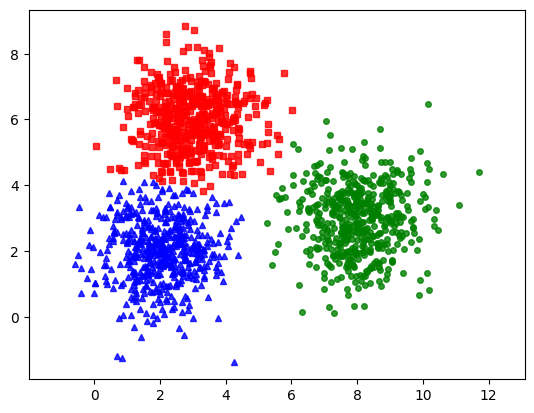

In [57]:
(centers, labels, it) = kmeans(X, K)

kmeans_display(X, labels[-1])